Inspired from
https://scipython.com/book2/chapter-7-matplotlib/problems/p77/animation-of-the-diffusion-equation/

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
ref = 4
ntToGet = 2400 * 2 ** ref

filename = "../src/sol_{}_{}_{}.txt".format(ntToGet)

In [3]:
# Step 1: read data
f = open(filename, 'r')
nt, nx, ny = list(map(int, f.readlines(1)[0][:-1].split(" ")))
u = np.array_split(np.loadtxt(filename, skiprows = 1), nt)
for i in range(len(u)):
    u[i] = np.reshape(u[i], (nx, ny))
    
Lt = 300.
dt = Lt / (nt - 1)
print(nt-1)

2400


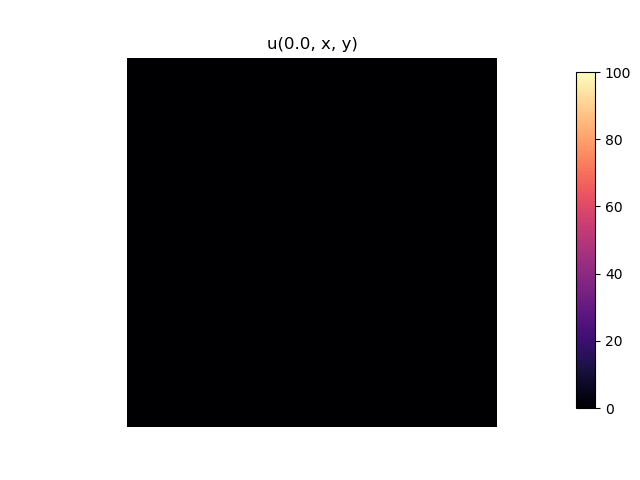

In [4]:
# Step 2: visualize
fig = plt.figure()
ax = fig.add_subplot()
im = ax.imshow(u[0], cmap=plt.get_cmap('magma'), vmin=0, vmax=100, interpolation='bicubic')
ax.set_axis_off()
ax.set_title('u(0.0, x, y)')
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
fig.colorbar(im, cax=cbar_ax)

def animate(i):
    global u
    ax.set_title('u({:.1f}, x, y)'.format(i*dt))
    im.set_data(u[i])
    
time_stop = 300.
nt_stop = (int) ((time_stop / dt) + 1)

interval = 1
ani = animation.FuncAnimation(fig, animate, frames=nt_stop, repeat=False,
                              interval=interval)
plt.show()